In [1]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bf499d64b2c1a46f021484cbcb83ede5cedb34500de6f07d9a820fd7159e6ec0
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
ERROR: pip's dependen

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import auth
from google.colab import drive
auth.authenticate_user()

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path = '/content/gdrive/My Drive/Colab Notebooks/prj3/'
df = pd.read_csv(path + 'Bank Customer Churn Prediction.csv')
print(df.head(2))

   customer_id  credit_score country  gender  age  tenure   balance  \
0     15634602           619  France  Female   42       2      0.00   
1     15647311           608   Spain  Female   41       1  83807.86   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [5]:
profile1 = ProfileReport(df, title="Profiling Report :: ABC Bank Churn")
profile1

Output hidden; open in https://colab.research.google.com to view.

#### Segment를 나눠서 진행할지 확인. 나눈다면 어떤 기준으로 나눠서 모델을 만들지
-> 각 segment의 크기가 너무 작아지지 않으면서, 유의미한 차이점이 있도록 나눠야함

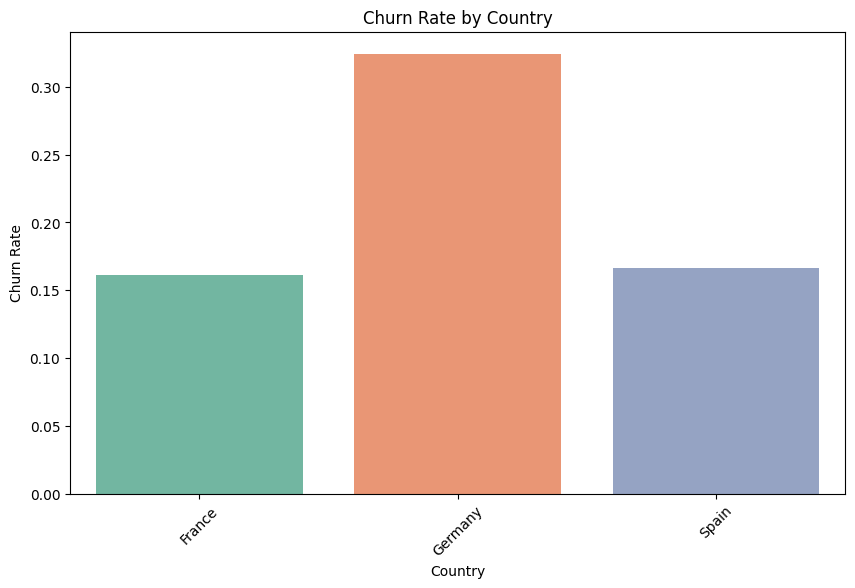

In [6]:
# 각 국가별 churn rate 계산
churn_rate_by_country = df.groupby('country')['churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='churn', data=churn_rate_by_country, palette='Set2')
plt.title('Churn Rate by Country')
plt.xlabel('Country')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

#### germany의 경우 churn rate가 유의미하게 높은 모습을 확인 가능

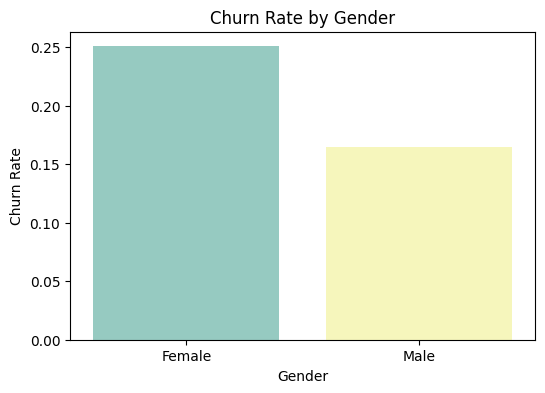

In [7]:
churn_rate_by_gender = df.groupby('gender')['churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x='gender', y='churn', data=churn_rate_by_gender, palette='Set3')
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.show()

#### 여성의 churn rate가 조금 더 높은 모습을 확인 가능

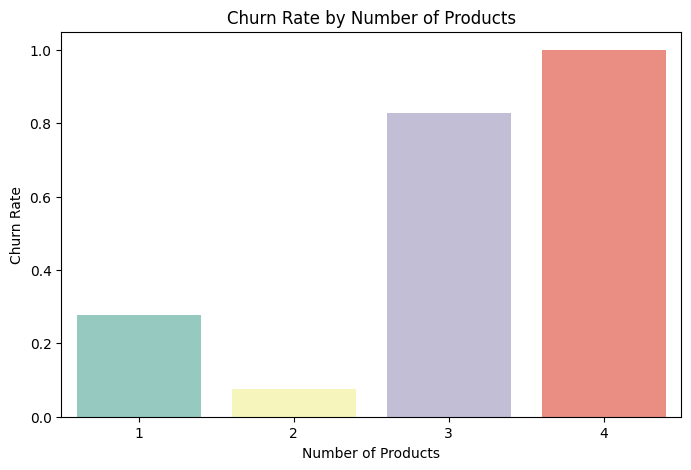

In [8]:
# products_number를 기준으로 그룹화하여 churn rate 계산
churn_rate_by_products_number = df.groupby('products_number')['churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(x='products_number', y='churn', data=churn_rate_by_products_number, palette='Set3')
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.show()


#### NoP가 3~4인 경우 overfitting 문제가 걱정된다. 각 그룹의 데이터 개수 및 churn rate를 살펴보자

In [9]:
# products_number별 churn rate와 데이터 개수 구하기
products_number_groups = df.groupby('products_number')['churn']

# 각 그룹의 데이터 개수 구하기
group_counts = products_number_groups.count()

# 각 그룹의 churn rate 구하기
group_churn_rate = products_number_groups.mean()

# 결과 출력
print("Products_number\tData Count\tChurn Rate")
for products_number, count, churn_rate in zip(group_counts.index, group_counts, group_churn_rate):
    print(f"{products_number}\t\t{count}\t\t{churn_rate:.2f}")

Products_number	Data Count	Churn Rate
1		5084		0.28
2		4590		0.08
3		266		0.83
4		60		1.00


#### NoP에 따라 churn rate가 급격하게 변하는 모습을 확인 가능하며, NoP가 3~4인 경우 총 데이터 개수가 절대적으로 부족한 모습을 확인 가능하다

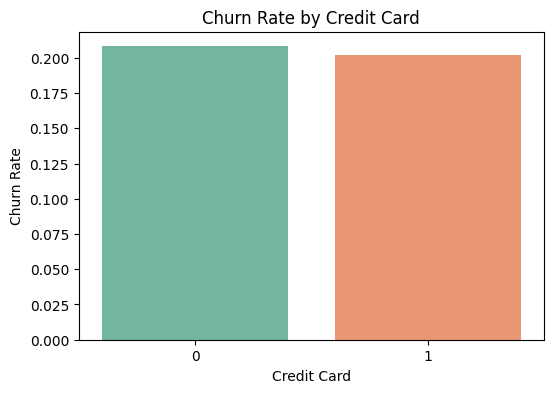

In [10]:
# credit_card를 기준으로 그룹화하여 churn rate 계산
churn_rate_by_credit_card = df.groupby('credit_card')['churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x='credit_card', y='churn', data=churn_rate_by_credit_card, palette='Set2')
plt.title('Churn Rate by Credit Card')
plt.xlabel('Credit Card')
plt.ylabel('Churn Rate')
plt.show()


#### credit card의 유무는 큰 차이가 없음


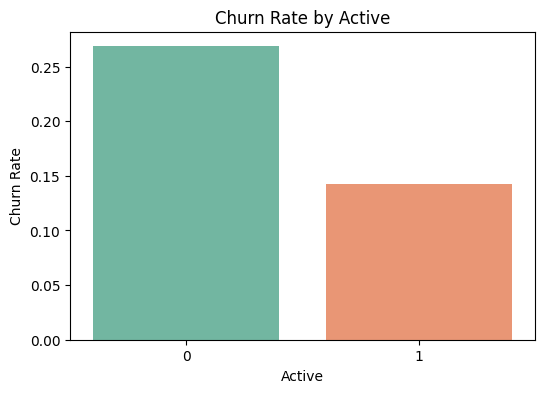

In [11]:
# active_user를 기준으로 그룹화하여 churn rate 계산
churn_rate_by_active = df.groupby('active_member')['churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x='active_member', y='churn', data=churn_rate_by_active, palette='Set2')
plt.title('Churn Rate by Active')
plt.xlabel('Active')
plt.ylabel('Churn Rate')
plt.show()


#### inactive(0)한 사용자의 churn rate가 유의미하게 높음

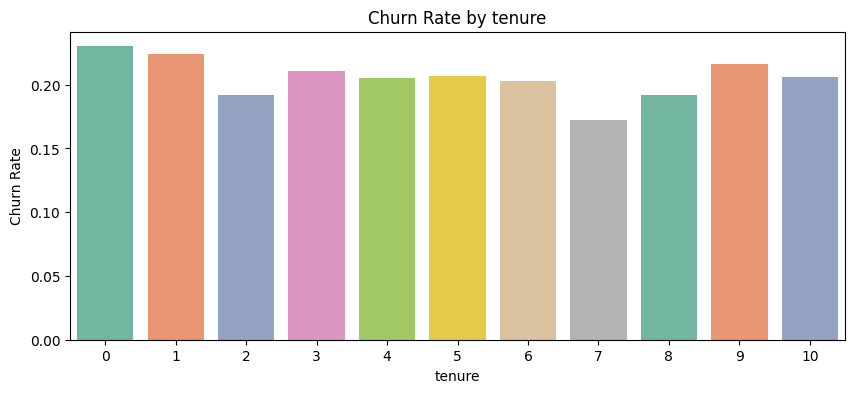

In [12]:
# tenure를 기준으로 그룹화하여 churn rate 계산
churn_rate_by_tenure = df.groupby('tenure')['churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 4))
sns.barplot(x='tenure', y='churn', data=churn_rate_by_tenure, palette='Set2')
plt.title('Churn Rate by tenure')
plt.xlabel('tenure')
plt.ylabel('Churn Rate')
plt.show()

#### tenure에 따른 churn rate의 유의미한 차이는 없어 보인다.
#### 유의할 점은 1~9까지의 값들은 10%정도로 균등하지만, 0과 10 같은 경우 4%에 가깝다

#### -------------------segment를 어떻게 나눌 지 다시 생각 필요------------------------

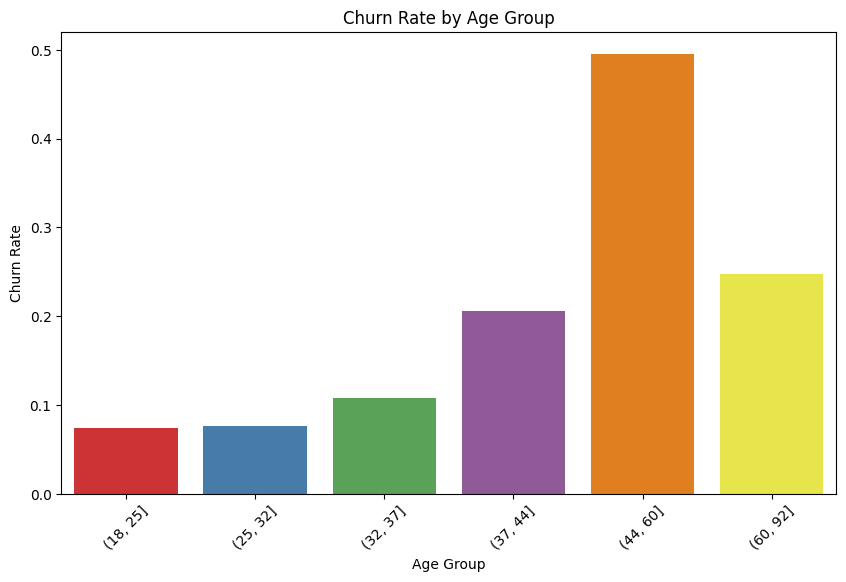

In [13]:
# 데이터의 최소값은 18이고 최대값은 92입니다. 5th 백분위수는 25이고, 95th 백분위수는 60입니다.

age_bins = [18, 25, 32, 37, 44, 60, 92]
# 각 연령대별 churn rate 계산
df['age_group'] = pd.cut(df['age'], bins=age_bins)
churn_rate_by_age = df.groupby('age_group')['churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='churn', data=churn_rate_by_age, palette='Set1')
plt.title('Churn Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()

In [14]:
# 각 구간별 데이터 개수 확인
for i in range(len(age_bins)-1):
    lower_bound = age_bins[i]
    upper_bound = age_bins[i+1]
    group_df = df[(df['age'] >= lower_bound) & (df['age'] < upper_bound)]
    print(f"Age Group {i+1} (range {lower_bound} to {upper_bound}): {group_df.shape[0]} rows")

Age Group 1 (range 18 to 25): 457 rows
Age Group 2 (range 25 to 32): 1915 rows
Age Group 3 (range 32 to 37): 2237 rows
Age Group 4 (range 37 to 44): 2794 rows
Age Group 5 (range 44 to 60): 2071 rows
Age Group 6 (range 60 to 92): 524 rows


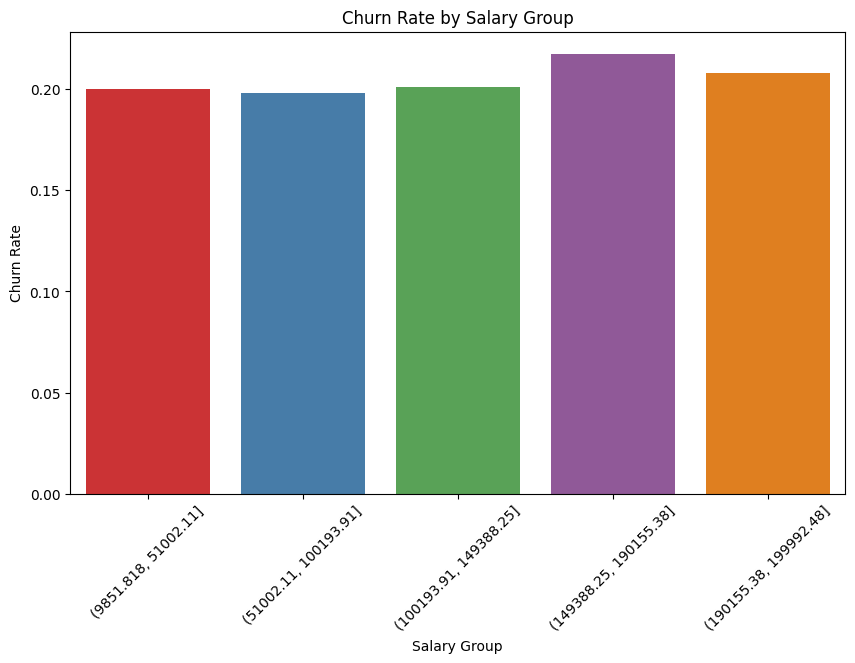

In [15]:
# salary_bins 설정
salary_bins = [9851.8185, 51002.11, 100193.91, 149388.25, 190155.38, 199992.48]

# 각 salary 구간에 속하는지 확인
df['salary_group'] = pd.cut(df['estimated_salary'], bins=salary_bins)

# 각 salary 구간별 churn rate 계산
churn_rate_by_salary = df.groupby('salary_group')['churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='salary_group', y='churn', data=churn_rate_by_salary, palette='Set1')
plt.title('Churn Rate by Salary Group')
plt.xlabel('Salary Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


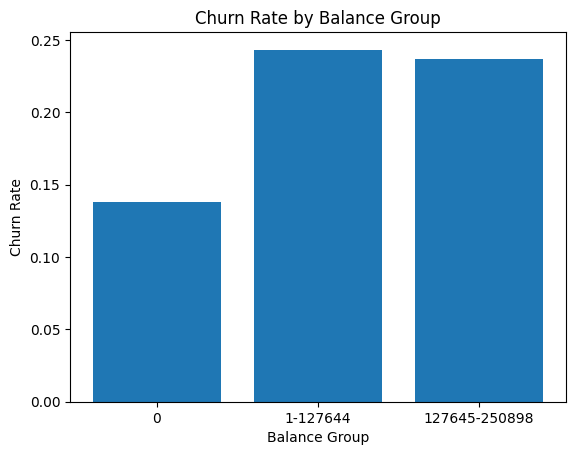

In [16]:
# balance_bin 설정
# Minimum	0
# 5-th percentile	0
# Q1	0
# median	97198.54
# Q3	127644.24
# 95-th percentile	162711.67
# Maximum	250898.09

# balance_bins에 따른 데이터 분할
balance_bins = [0, 1, 127644.24, 250898.09]
labels = ['0', '1-127644', '127645-250898']

# balance가 0인 경우 따로 처리
df['balance_group'] = pd.cut(df['balance'], bins=balance_bins, labels=labels)

# balance가 0인 경우 따로 시각화
balance_0_churn_rate = df[df['balance'] == 0]['churn'].mean()
balance_non_0_churn_rates = df[df['balance'] != 0].groupby('balance_group')['churn'].mean()

# 시각화
plt.bar(['0'] + list(balance_non_0_churn_rates.index), [balance_0_churn_rate] + list(balance_non_0_churn_rates.values))
plt.xlabel('Balance Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Balance Group')
plt.show()

In [17]:
# 각 구간별 데이터 개수 확인
for i in range(len(balance_bins)-1):
    lower_bound = balance_bins[i]
    upper_bound = balance_bins[i+1]
    group_df = df[(df['balance'] >= lower_bound) & (df['balance'] < upper_bound)]
    print(f"Balance Group {i+1} (range {lower_bound} to {upper_bound}): {group_df.shape[0]} rows")

Balance Group 1 (range 0 to 1): 3617 rows
Balance Group 2 (range 1 to 127644.24): 3883 rows
Balance Group 3 (range 127644.24 to 250898.09): 2499 rows


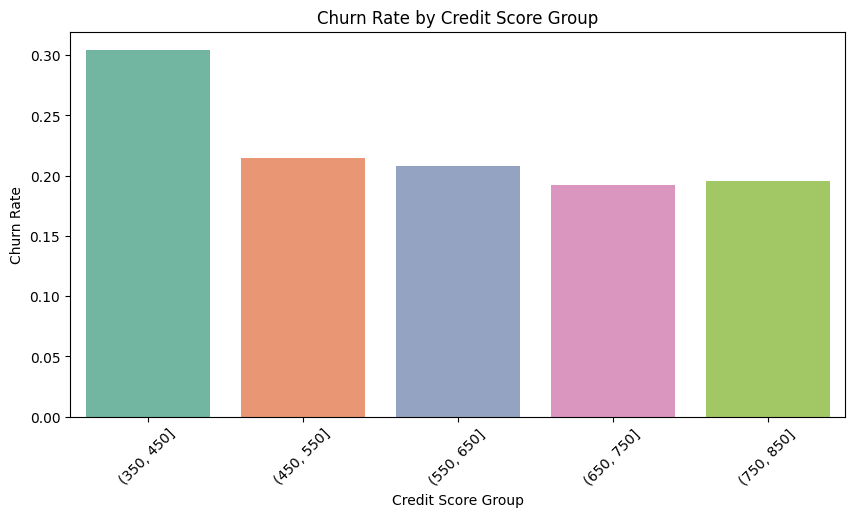

In [18]:
# credit_score_bins 설정
# For a score with a range between 300 and 850, a credit score of 700 or above is generally considered good.
# A score of 800 or above on the same range is considered to be excellent.
# Most consumers have credit scores that fall between 600 and 750.

credit_score_bins = [350, 450, 550, 650, 750, 850]

# 각 credit_score 구간에 속하는지 확인
df['credit_score_group'] = pd.cut(df['credit_score'], bins=credit_score_bins)

# 각 credit_score 구간별 churn rate 계산
churn_rate_by_credit_score = df.groupby('credit_score_group')['churn'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x='credit_score_group', y='churn', data=churn_rate_by_credit_score, palette='Set2')
plt.title('Churn Rate by Credit Score Group')
plt.xlabel('Credit Score Group')
plt.ylabel('Churn Rate')
plt.xticks(rotation=45)
plt.show()


In [19]:
# 각 구간별 데이터 개수 확인
for i in range(len(credit_score_bins)-1):
    lower_bound = credit_score_bins[i]
    upper_bound = credit_score_bins[i+1]
    group_df = df[(df['credit_score'] >= lower_bound) & (df['credit_score'] < upper_bound)]
    print(f"Credit Score Group {i+1} (range {lower_bound} to {upper_bound}): {group_df.shape[0]} rows")


Credit Score Group 1 (range 350 to 450): 185 rows
Credit Score Group 2 (range 450 to 550): 1405 rows
Credit Score Group 3 (range 550 to 650): 3310 rows
Credit Score Group 4 (range 650 to 750): 3477 rows
Credit Score Group 5 (range 750 to 850): 1390 rows


#### 그룹 1의 데이터수가 너무 적은 관계로 Z-검정 수행

In [20]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# 그룹 1의 churn rate와 전체 데이터셋의 churn rate
p1 = 0.3
p2 = 0.25

# 그룹 1과 전체 데이터셋의 샘플 크기
n1 = 185  # 그룹 1의 데이터 개수
n2 = df.shape[0]  # 전체 데이터셋의 데이터 개수

# 두 비율 간의 차이에 대한 Z-통계량 계산
p = (n1 * p1 + n2 * p2) / (n1 + n2)
z_stat, p_value = proportions_ztest([n1 * p1, n2 * p2], [n1, n2])

# 결과 출력
print("Z-statistic:", z_stat)
print("P-value:", p_value)

# 유의수준 설정
alpha = 0.05

# p-value와 유의수준 비교
if p_value < alpha:
    print("\n유의수준 {}에서 귀무가설을 기각합니다. 즉, 그룹 1의 churn rate와 전체 데이터셋의 churn rate는 다릅니다.".format(alpha))
else:
    print("\n유의수준 {}에서 귀무가설을 기각할 수 없습니다. 즉, 그룹 1의 churn rate와 전체 데이터셋의 churn rate는 같습니다.".format(alpha))


Z-statistic: 1.5543556776193788
P-value: 0.1200995993708757

유의수준 0.05에서 귀무가설을 기각할 수 없습니다. 즉, 그룹 1의 churn rate와 전체 데이터셋의 churn rate는 같습니다.


#### 추가 분석 : balance가 0인 사용자와 active_member가 0인 사용자

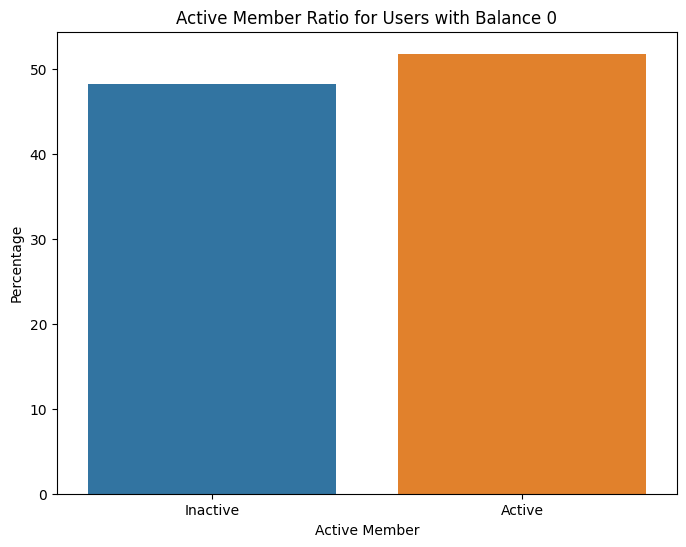

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# balance가 0인 사용자들만 필터링
zero_balance_users = df[df['balance'] == 0]

# active_member가 0과 1인 사용자의 비율 계산
active_member_counts = zero_balance_users['active_member'].value_counts(normalize=True) * 100

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=active_member_counts.index, y=active_member_counts.values)
plt.title('Active Member Ratio for Users with Balance 0')
plt.xlabel('Active Member')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['Inactive', 'Active'])
plt.show()

#### balance가 0이라고 해서 inactive한 사용자이지는 않다

#### 데이터셋 나누기

In [22]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_group,salary_group,balance_group,credit_score_group
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(37, 44]","(100193.91, 149388.25]",NaN,"(550, 650]"
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(37, 44]","(100193.91, 149388.25]",1-127644,"(550, 650]"
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(37, 44]","(100193.91, 149388.25]",127645-250898,"(450, 550]"
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(37, 44]","(51002.11, 100193.91]",NaN,"(650, 750]"
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(37, 44]","(51002.11, 100193.91]",1-127644,"(750, 850]"


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split

#모든 변수를 feature로 삼아서 테스트
feature_cols = ['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

# features와 target 분리
X = df[feature_cols]
y = df['churn']  # churn을 target으로 사용

# train-test split (테스트 데이터는 계층적 샘플링을 사용하지 않습니다)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train-validation split (검증용 데이터는 계층적 샘플링을 사용합니다)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)  # 0.25 x 0.8 = 0.2

# 각 데이터셋의 크기 확인
print("Train set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Train set size: (6000, 10)
Validation set size: (2000, 10)
Test set size: (2000, 10)


In [24]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# One-hot encoding할 범주형 변수의 열 목록
categorical_cols = ['country', 'gender']

# Scaling할 수치형 변수의 열 목록
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# ColumnTransformer를 사용하여 범주형 변수와 수치형 변수를 처리하는 파이프라인 정의
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # 수치형 변수에 대한 스케일링
        ('cat', OneHotEncoder(), categorical_cols)  # 범주형 변수에 대한 one-hot encoding
    ])

# 전처리 파이프라인 정의
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# 학습용 데이터에 파이프라인 적용
X_train_processed = pipeline.fit_transform(X_train)

# 검증용 데이터에 파이프라인 적용
X_val_processed = pipeline.transform(X_val)

# 테스트용 데이터에 파이프라인 적용
X_test_processed = pipeline.transform(X_test)

# 전처리 후 데이터 shape 확인
print("Shape of processed training data:", X_train_processed.shape)
print("Shape of processed validation data:", X_val_processed.shape)
print("Shape of processed test data:", X_test_processed.shape)


Shape of processed training data: (6000, 11)
Shape of processed validation data: (2000, 11)
Shape of processed test data: (2000, 11)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 모델 학습
model = LogisticRegression()
model.fit(X_train_processed, y_train)

# 검증용 데이터로 예측 및 성능 평가
val_predictions = model.predict(X_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# 테스트용 데이터로 예측 및 성능 평가
test_predictions = model.predict(X_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)


Validation Accuracy: 0.788
Test Accuracy: 0.802


In [26]:
# 모델에서 각 변수의 가중치와 변수명을 함께 출력하는 함수
def print_weights(model, feature_names):
    weights = model.coef_[0]
    for feature, weight in zip(feature_names, weights):
        print(f"{feature}: {weight:.4f}")

In [27]:
# country: 0.6748. France 대비 다른 국가에서는 이탈할 확률이 더 높습니다.
# credit_card: 0.4785. 신용카드를 소유한 고객들이 이탈할 확률이 더 높습니다.
# estimated_salary: 0.2806. 고객의 예상 연봉이 높을수록 이탈할 확률이 약간 증가합니다.
# products_number: -0.2664. 보유한 상품 개수가 많을수록 이탈할 확률이 감소합니다.
# active_member: -0.2121. 활성 고객일수록 이탈할 확률이 감소합니다.
# age: 0.1139. 고객의 나이가 많을수록 이탈할 확률이 약간 증가합니다.
# tenure: -0.0629. 은행에 머문 기간이 길수록 이탈할 확률이 감소합니다.
# credit_score: -0.0631. 신용점수가 높을수록 이탈할 확률이 감소합니다.
# balance: 0.0203. 잔고가 높을수록 이탈할 확률이 약간 증가합니다.
# gender: -0.0177. 여성보다는 남성이 이탈할 확률이 더 낮습니다.

print_weights(model, feature_cols)

credit_score: -0.0631
country: 0.6748
gender: -0.0177
age: 0.1139
tenure: -0.0629
balance: 0.0203
products_number: -0.2664
credit_card: 0.4785
active_member: -0.2121
estimated_salary: 0.2806


#### 이탈율이 가장 높은 Germany를 제외하고 나머지 두 국가만 사용하여 분석

In [39]:
new_group_df = df[df['country'] == 'Germany'].copy()
new_group_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,age_group,salary_group,balance_group,credit_score_group
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,"(25, 32]","(100193.91, 149388.25]",1-127644,"(350, 450]"
15,15643966,616,Germany,Male,45,3,143129.41,2,0,1,64327.26,0,"(44, 60]","(51002.11, 100193.91]",127645-250898,"(550, 650]"
16,15737452,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,"(44, 60]",NaN,127645-250898,"(650, 750]"
26,15736816,756,Germany,Male,36,2,136815.64,1,1,1,170041.95,0,"(32, 37]","(149388.25, 190155.38]",127645-250898,"(750, 850]"
28,15728693,574,Germany,Female,43,3,141349.43,1,1,1,100187.43,0,"(37, 44]","(51002.11, 100193.91]",127645-250898,"(550, 650]"


In [40]:
# 나라를 고려하지 않고 진행
feature_cols = ['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']

# features와 target 분리
X = new_group_df[feature_cols]
y = new_group_df['churn']  # churn을 target으로 사용

# train-test split (테스트 데이터는 계층적 샘플링을 사용하지 않습니다)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train-validation split (검증용 데이터는 계층적 샘플링을 사용합니다)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)  # 0.25 x 0.8 = 0.2

# 각 데이터셋의 크기 확인
print("Train set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Train set size: (1505, 9)
Validation set size: (502, 9)
Test set size: (502, 9)


In [41]:
# One-hot encoding할 범주형 변수의 열 목록
categorical_cols = [ 'gender']

# Scaling할 수치형 변수의 열 목록
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# ColumnTransformer를 사용하여 범주형 변수와 수치형 변수를 처리하는 파이프라인 정의
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # 수치형 변수에 대한 스케일링
        ('cat', OneHotEncoder(), categorical_cols)  # 범주형 변수에 대한 one-hot encoding
    ])

# 전처리 파이프라인 정의
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# 학습용 데이터에 파이프라인 적용
X_train_processed = pipeline.fit_transform(X_train)

# 검증용 데이터에 파이프라인 적용
X_val_processed = pipeline.transform(X_val)

# 테스트용 데이터에 파이프라인 적용
X_test_processed = pipeline.transform(X_test)

# 전처리 후 데이터 shape 확인
print("Shape of processed training data:", X_train_processed.shape)
print("Shape of processed validation data:", X_val_processed.shape)
print("Shape of processed test data:", X_test_processed.shape)


Shape of processed training data: (1505, 8)
Shape of processed validation data: (502, 8)
Shape of processed test data: (502, 8)


In [42]:
# 모델 학습
model = LogisticRegression()
model.fit(X_train_processed, y_train)

# 검증용 데이터로 예측 및 성능 평가
val_predictions = model.predict(X_val_processed)
val_accuracy = accuracy_score(y_val, val_predictions)
print("Validation Accuracy:", val_accuracy)

# 테스트용 데이터로 예측 및 성능 평가
test_predictions = model.predict(X_test_processed)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.7151394422310757
Test Accuracy: 0.6812749003984063


In [43]:
# 절대값을 기준으로 내림차순 정렬
# 'gender': 0.6891
# 'active_member': -0.2772
# 'credit_card': 0.2774
# 'credit_score': -0.0725
# 'balance': -0.0703
# 'products_number': -0.0634
# 'tenure': 0.0375
# 'age': -0.0132

print_weights(model, feature_cols)

credit_score: -0.0725
gender: 0.6891
age: -0.0132
tenure: 0.0375
balance: -0.0703
products_number: -0.0634
credit_card: 0.2774
active_member: -0.2772
